In [1]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data') #pandas를 사용해 농어 데이터를 데이터프레임에 저장
perch_full = df.to_numpy()  #데이터프레임에 저장된 csv 파일을 numpy 배열로 바꾸는 method
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [4]:
from sklearn.preprocessing import PolynomialFeatures  #변환기 PolynomialFeatures

In [5]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [6]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [7]:
poly = PolynomialFeatures(include_bias=False) #include_bias=False로 설정하면 절편 항 제거, 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 이와 같이 설정
poly.fit(train_input) #새롭게 만들 특성 조합을 찾는다.
train_poly = poly.transform(train_input)  #실제로 데이터를 변환
print(train_poly.shape)

(42, 9)


In [8]:
poly.get_feature_names_out()  #9개의 특성이 각각 어떤 입력의 조합으로 만들어졌는지 확인

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [9]:
test_poly = poly.transform(test_input)

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [11]:
print(lr.score(test_poly, test_target))

0.9714559911594111


In [12]:
"""
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly) #표준점수로 변환
test_scaled = ss.transform(test_poly) #표준점수로 변환
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
"""

'\nfrom sklearn.preprocessing import StandardScaler\nss = StandardScaler()\nss.fit(train_poly)\ntrain_scaled = ss.transform(train_poly) #표준점수로 변환\ntest_scaled = ss.transform(test_poly) #표준점수로 변환\nlr.fit(train_scaled, train_target)\nprint(lr.score(train_scaled, train_target))\nprint(lr.score(test_scaled, test_target))\n'



---



---



---



In [13]:
poly = PolynomialFeatures(degree=5, include_bias=False) #매개변수 degree로 고차항의 최대 차수 지정 가능
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [14]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [15]:
print(lr.score(test_poly, test_target))

-144.40579436844948


In [16]:
"""
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)  #해당 과정을 꼭 거쳐야

train_scaled = ss.transform(train_poly) #표준점수로 변환
test_scaled = ss.transform(test_poly) #표준점수로 변환

lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
"""

'\nfrom sklearn.preprocessing import StandardScaler\nss = StandardScaler()\nss.fit(train_poly)  #해당 과정을 꼭 거쳐야 \n\ntrain_scaled = ss.transform(train_poly) #표준점수로 변환\ntest_scaled = ss.transform(test_poly) #표준점수로 변환\n\nlr.fit(train_scaled, train_target)\nprint(lr.score(train_scaled, train_target))\nprint(lr.score(test_scaled, test_target))\n'

In [17]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_poly, train_target)
print(ridge.score(train_poly, train_target))

0.9970688863268867


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


In [18]:
print(ridge.score(test_poly, test_target))

0.9149349567850471


In [19]:
import matplotlib.pyplot as plt
train_score = []  #alpha 값을 바꿀 때마다 score() 결과를 저장할 리스트
test_score = [] #alpha 값을 바꿀 때마다 score() 결과를 저장할 리스트

In [20]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] #alpha 값마다 R^2 그래프를 그려 최적(훈련 세트와 테스트 세트의 점수가 가장 가까운 지점)의 alpha 값 탐색
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_poly, train_target)
  train_score.append(ridge.score(train_poly, train_target))
  test_score.append(ridge.score(test_poly, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=9.95201e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


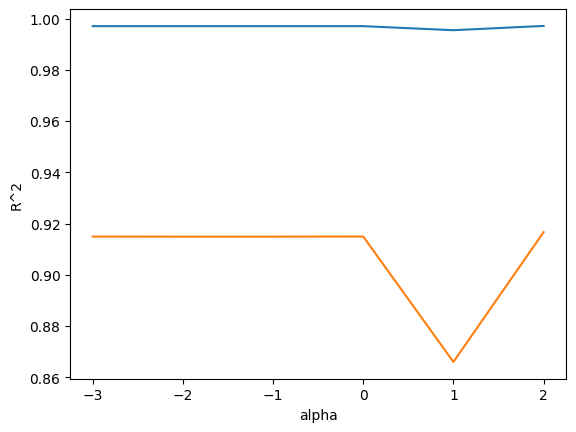

In [21]:
plt.plot(np.log10(alpha_list), train_score) #0.001부터 100까지의 x축이 동일한 간격을 가지도록 log 함수로 변형
plt.plot(np.log10(alpha_list), test_score)  #0.001부터 100까지의 x축이 동일한 간격을 가지도록 log 함수로 변형
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [22]:
ridge = Ridge(alpha=0.1)  #최적의 alpha 값으로 모델을 훈련
ridge.fit(train_poly, train_target)
print(ridge.score(train_poly, train_target))
print(ridge.score(test_poly, test_target))

0.9970689198392951
0.9149029537458795


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


In [23]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_poly, train_target)
print(ridge.score(train_poly, train_target))

0.9970689198392951


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.402e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


In [24]:
print(lasso.score(test_poly, test_target))

0.9829845191292338


In [25]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000)  #ConvergenceWarning: 최적의 계수를 찾기 위한 반복적 계산의 반복 횟수가 부족할 때 발생하는 경고, max_iter: 반복 횟수를 충분히 늘리기 사용
  lasso.fit(train_poly, train_target)
  train_score.append(lasso.score(train_poly, train_target))
  test_score.append(lasso.score(test_poly, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.945e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.952e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.988e+04, tolerance: 5.183e

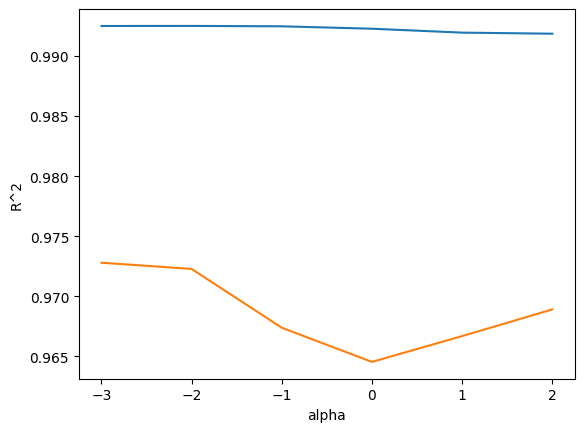

In [26]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [27]:
lasso = Lasso(alpha=10)
lasso.fit(train_poly, train_target)
print(lasso.score(train_poly,train_target))
print(lasso.score(test_poly, test_target))

0.9907649441128418
0.9814356958575168


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.413e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


In [28]:
print(np.sum(lasso.coef_ ==0))  #라쏘 모델이 0으로 만든 계수의 개수

9
